In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from datetime import datetime
import matplotlib as mpl

spreadsheet_id = "YOUR_SPREADSHEET_ID" # Replace with your Sheet ID
sheet_id = "0" # Replace with your GID (0 is usually the first sheet)

url = f"https://docs.google.com/spreadsheets/d/16HNvRGn6rM0YFKnyvNpQlfmxrgw8ugTsu9iZ6fjQORQ/export?gid=0&format=csv"


df = pd.read_csv(url)
df['Military_Time']=pd.to_datetime(df['Time'],format='%I:%M %p').dt.strftime('%H:%M')
df['datetime_col'] = pd.to_datetime(df['Date'] + ' ' + df['Military_Time'])
df['threshold']=0.8*df['Total Feed Volume [mL]']
greatFeed = []
size = []
for index, row in df.iterrows():
    if row['Volume [mL]'] > row['threshold']:
        greatFeed.append(row['Volume [mL]'])
        size.append(500)
    else:
        greatFeed.append(np.nan)
        size.append(300)
df['greatFeed']=greatFeed
df['size']=size
#df
df2 = df[df['greatFeed'].notna()]
#print(df2)
#print(size)
# Calculate 24hr Feed %
df3 = df.tail(7)
runningFeed = sum(df3['Volume [mL]'])
totalRunningOffered = sum(df3['Total Feed Volume [mL]'])
twentyFourHR = runningFeed/totalRunningOffered*100
print("24hr Consumption: ",round(twentyFourHR,2),"%\n",sep='')
#print(df3)
#Calculate Averages
df.loc[df['Food']=='AR (22 cal)'].mean(axis=0, skipna=True, numeric_only=True)

24hr Consumption: 66.67%



Volume [mL]                63.466667
Total Feed Volume [mL]     94.866667
threshold                  75.893333
greatFeed                  75.800000
size                      366.666667
dtype: float64

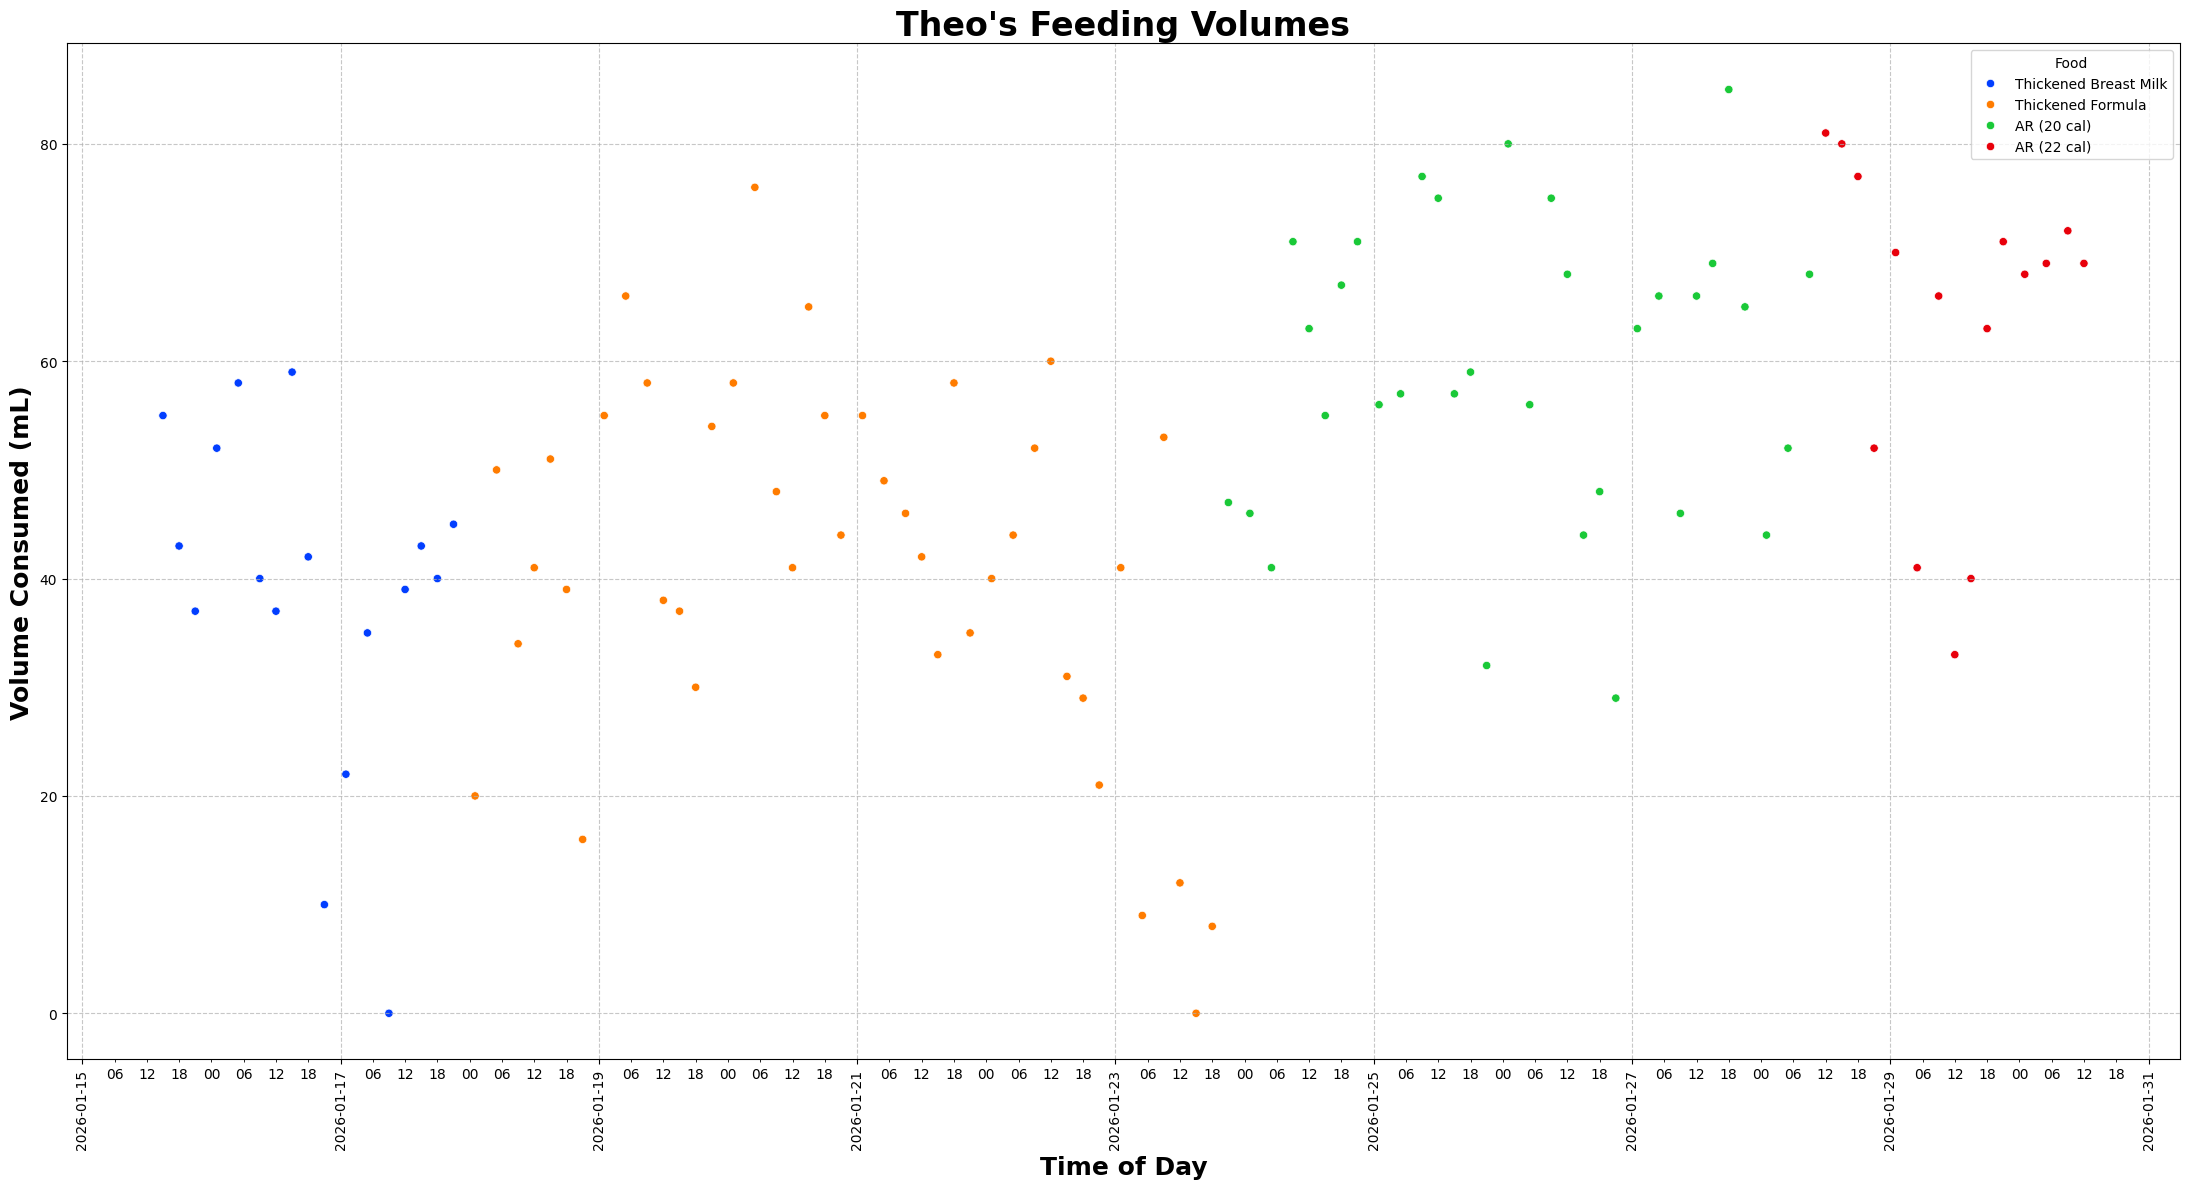

In [2]:
amounts = df['Volume [mL]'] # Amount in ml
times = df['datetime_col']

# 2. Setup the Plot
fig, ax = plt.subplots(figsize=(22, 12))

# 3. Plot the data
# Plotting with a marker 'o' to see specific feed times
xticks = df.datetime_col.to_list()
#ax.plot(times, amounts, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

sns.scatterplot(data=df,x='datetime_col', y='Volume [mL]', hue = 'Food', palette='bright')
#sns.scatterplot(data=df2,x='datetime_col', y='greatFeed', hue='Food', palette='bright',s=200)
# 4. Plot the line plot on the same axes
#sns.lineplot(data=df, x='datetime_col', y='threshold', ax=ax, color='red', label='80%')
# 4. Customize the plot (Labels, Title, Formatting)
ax.set_title("Theo's Feeding Volumes", fontsize=24, weight = 'bold')
ax.set_ylabel("Volume Consumed (mL)", fontsize=18, weight = 'bold')
ax.set_xlabel("Time of Day", fontsize=18, weight = 'bold')

# Format the X-axis to show hours clearly
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M'))
#fig.autofmt_xdate() # Rotates the labels to prevent overlap
plt.xticks(rotation=90)
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(24), interval=6, tz=None))
date_form = mdates.DateFormatter("%H")
ax.xaxis.set_minor_formatter(date_form)

# Add grid lines for easier reading
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

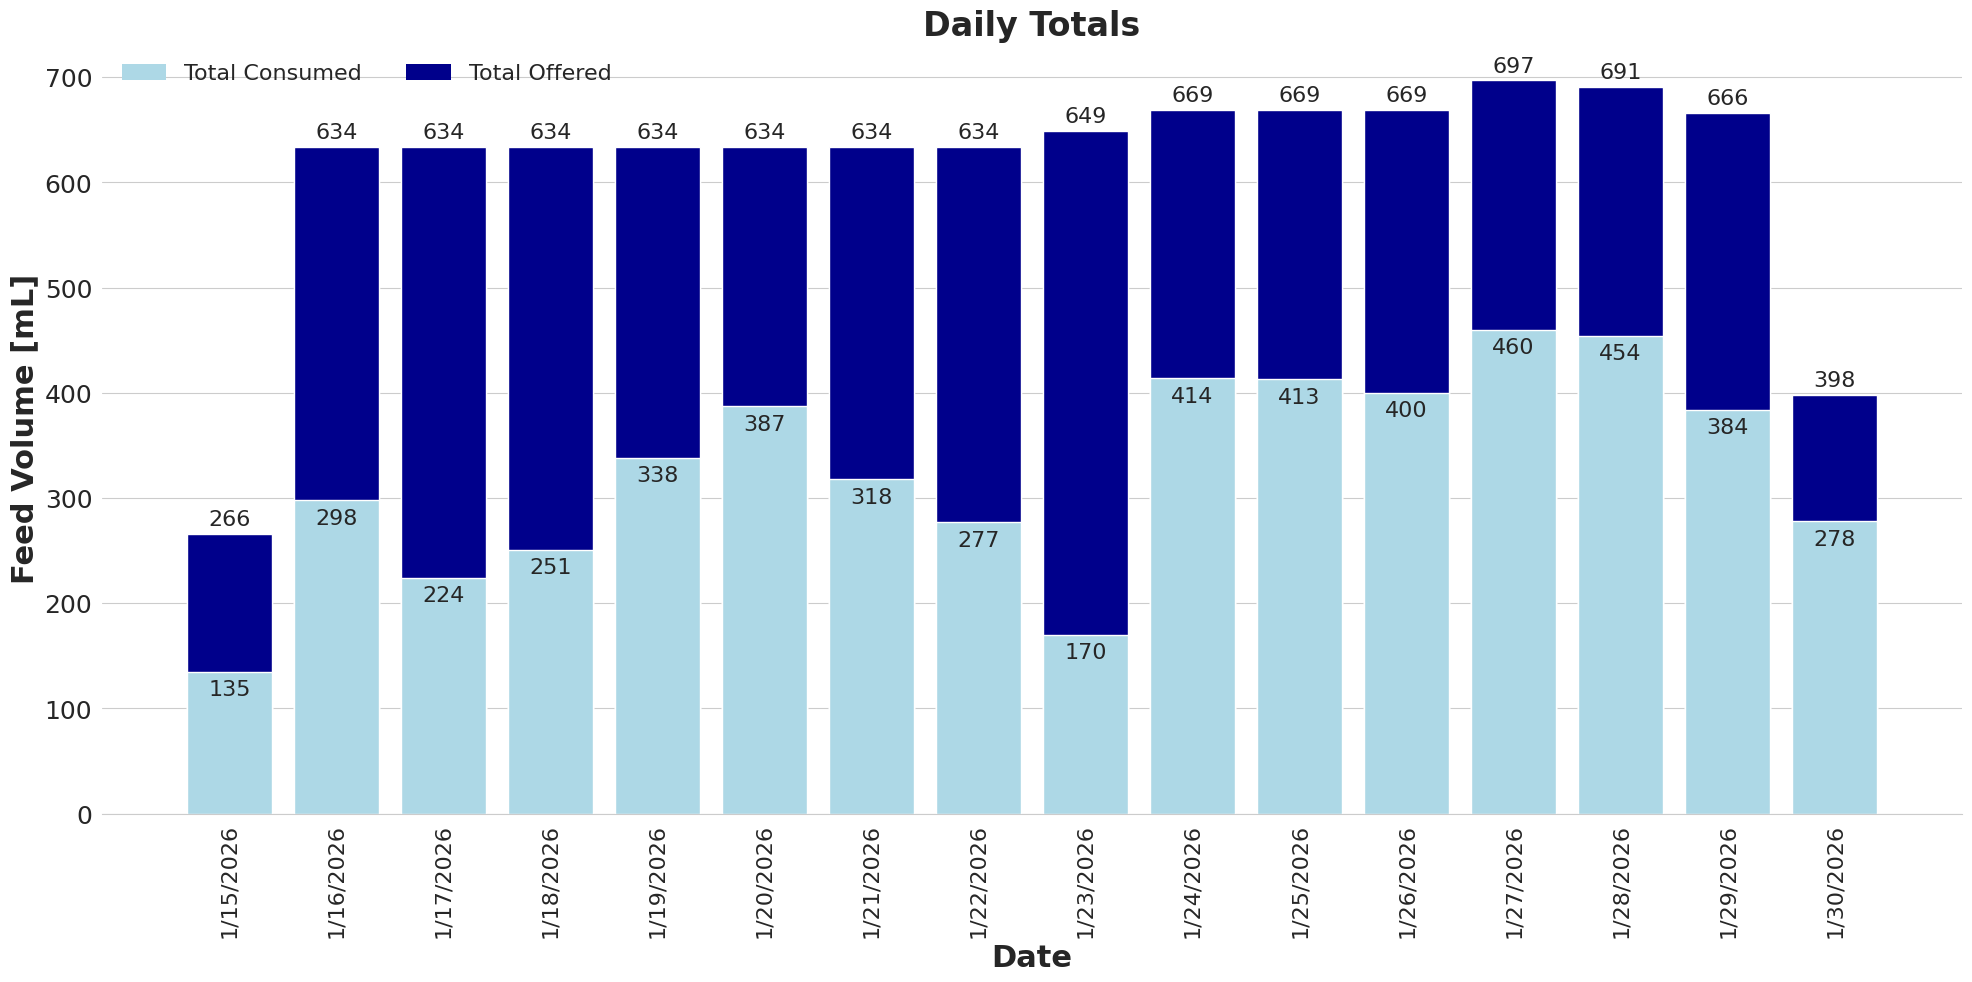

In [3]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = dailyMax['Date'], y = dailyMax['Total Feed Volume [mL]'], color = "darkblue")
ax.set_title("Daily Totals", fontsize=24, weight = 'bold')
#Plot 2 - overlay - "Total Daily Consumption"
bottom_plot = sns.barplot(x = dailyTotals['Date'], y = dailyTotals['Volume [mL]'], color = "lightblue")


topbar = plt.Rectangle((0,0),1,1,fc="darkblue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='lightblue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Consumed', 'Total Offered'], loc=0, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
#bottom_plot.set_ylabel("Feed Volume [mL]")
#bottom_plot.set_xlabel("Date")
ax.set_ylabel("Feed Volume [mL]", fontsize=22, weight = 'bold')
ax.set_xlabel("Date", fontsize=22, weight = 'bold')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=16,rotation=90)
bars2 = ax.bar(dailyMax['Date'], dailyMax['Total Feed Volume [mL]'],color='darkblue')
ax.bar_label(bars2, padding=3, size=16);
bars1 = ax.bar(dailyTotals['Date'], dailyTotals['Volume [mL]'],color='lightblue')
ax.bar_label(bars1, padding=-20, size=16);


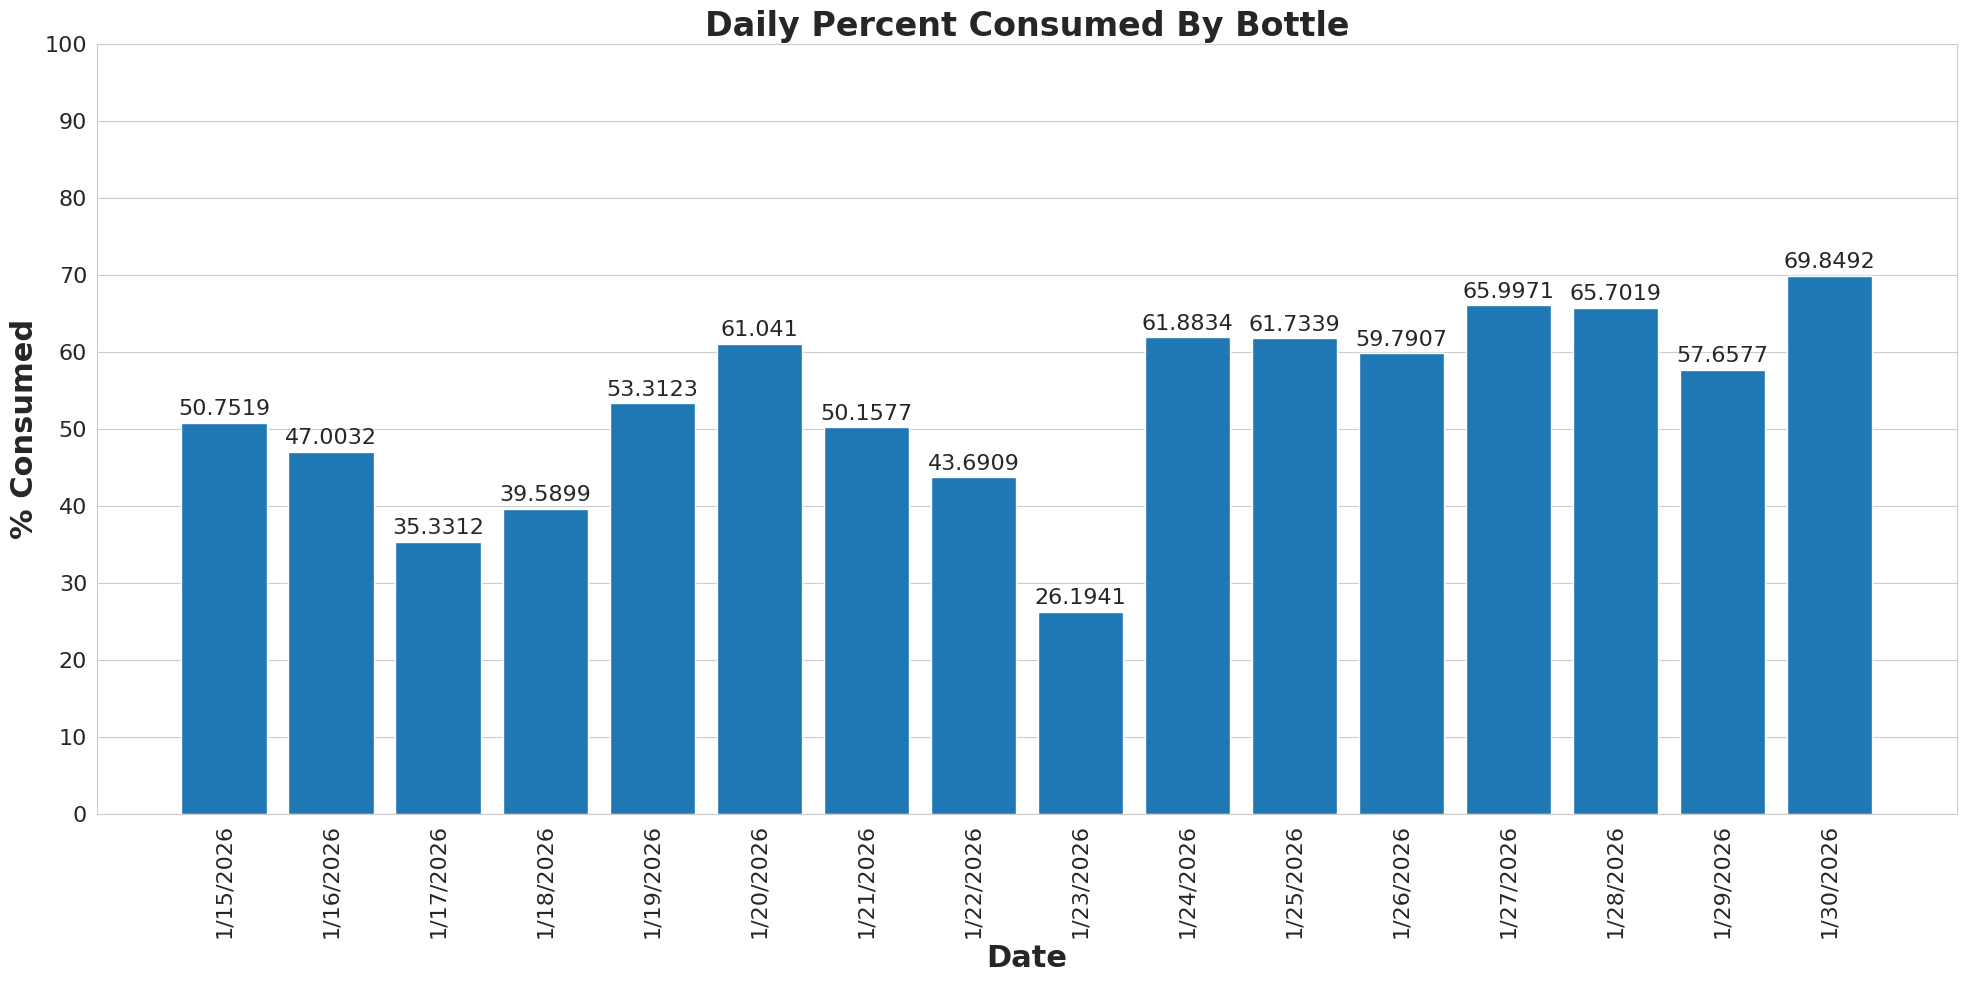

In [4]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()
dailyPercent = dailyTotals['Volume [mL]']/dailyMax['Total Feed Volume [mL]']*100
#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = dailyMax['Date'], y = dailyPercent, color = "darkblue")
bars = ax.bar(dailyMax['Date'], dailyPercent)

#Optional code - Make plot look nicer
#sns.despine(left=True)
ax.set_title("Daily Percent Consumed By Bottle", fontsize=24, weight = 'bold')
ax.set_ylabel("% Consumed", fontsize=22, weight = 'bold')
ax.set_xlabel("Date", fontsize=22, weight = 'bold')
#desired_ticks = np.arange(0,1.1,10)
desired_ticks = np.arange(0,110,10)
ax.set_yticks(ticks=desired_ticks) 
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16,rotation=90)
# Add labels above the bars
ax.bar_label(bars, padding=3, size=16);


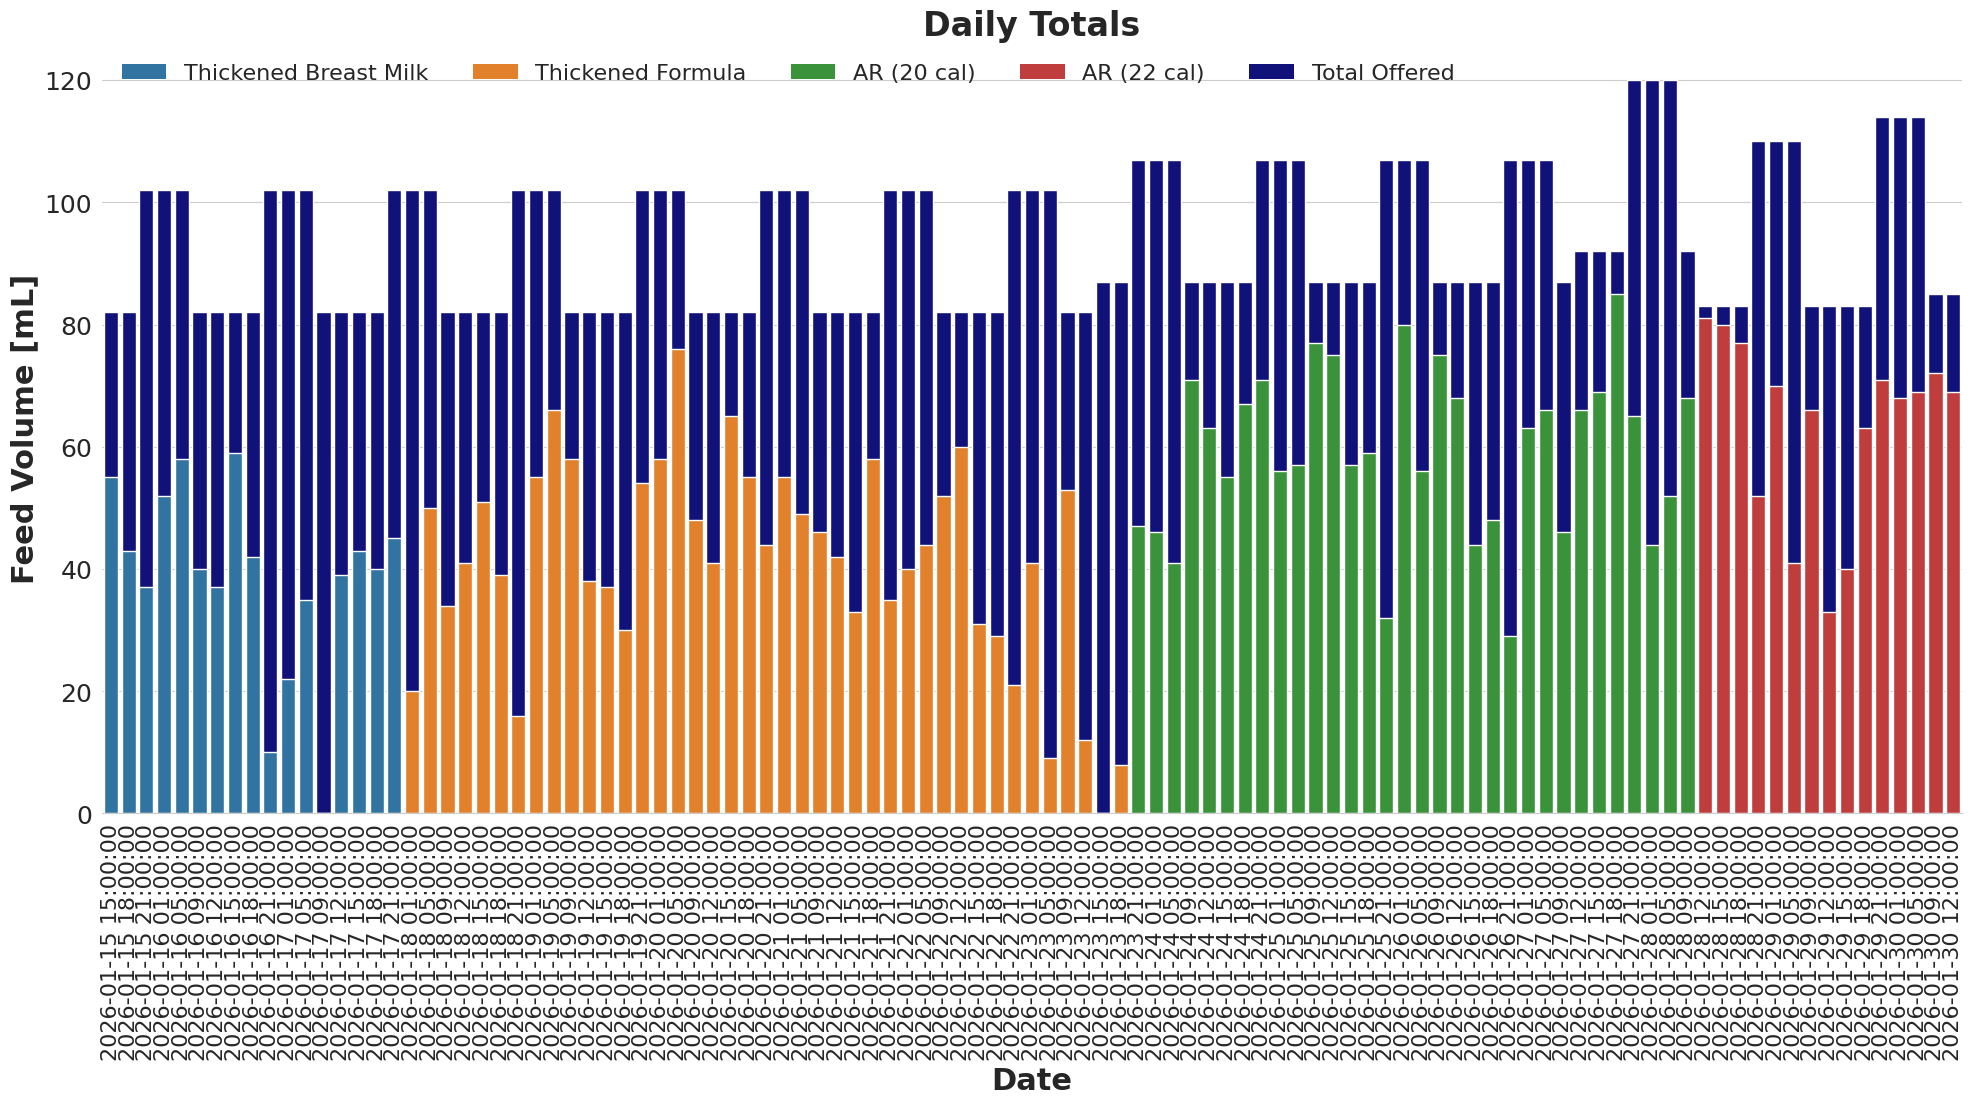

In [5]:
# Create Bar Plot - Each Feed Session
#Set general plot properties
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = df['datetime_col'], y = df['Total Feed Volume [mL]'], color = "darkblue")
ax.set_title("Daily Totals", fontsize=24, weight = 'bold')
#Plot 2 - overlay - "Total Daily Consumption"
bottom_plot = sns.barplot(x = df['datetime_col'], y = df['Volume [mL]'], hue=df.Food)

# Get the colors used in the plot
colors = []
for patch in ax.patches:
    # Get the facecolor (RGBA tuple) of each bar
    colors.append(patch.get_facecolor())
    
foods =[]
for food in df.Food.unique():
    foods.append(food)
foods.append('Total Offered')

colors=set(colors)
colorList = []
for color in colors:
    colorList.append(color)
    
#Customize Legend
topbar = plt.Rectangle((0,0),1,1,fc=colorList[4], edgecolor = 'none')
bottombar1 = plt.Rectangle((0,0),1,1,fc=colorList[2],  edgecolor = 'none')
bottombar2 = plt.Rectangle((0,0),1,1,fc=colorList[1],  edgecolor = 'none')
bottombar3 = plt.Rectangle((0,0),1,1,fc=colorList[3],  edgecolor = 'none')
bottombar4 = plt.Rectangle((0,0),1,1,fc=colorList[0],  edgecolor = 'none')
bars = [bottombar1,bottombar2,bottombar3,bottombar4,topbar]
l = plt.legend(bars, foods, loc=0, ncol = 5, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
#bottom_plot.set_ylabel("Feed Volume [mL]")
#bottom_plot.set_xlabel("Date")
ax.set_ylabel("Feed Volume [mL]", fontsize=22, weight = 'bold')
ax.set_xlabel("Date", fontsize=22, weight = 'bold')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=16, rotation=90);